# Import the libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import tarfile
import urllib.request

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Fetching the data

In [3]:
fetch_housing_data()

# Loading the data

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing_data = load_housing_data()

# Take a quick look at the data structure

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are 20640 instances.
- `total_bedroom` attribute has 20433 non null values that means remaining are null values

## `ocean_proximity` attribute has a Dtype of object. So check what values are there.

In [8]:
housing_data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- `<1H OCEAN`, `INLAND`, `NEAR OCEAN`, `NEAR BAY`, `ISLAND` are all categories

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another method is to plot a histogram with hist() method

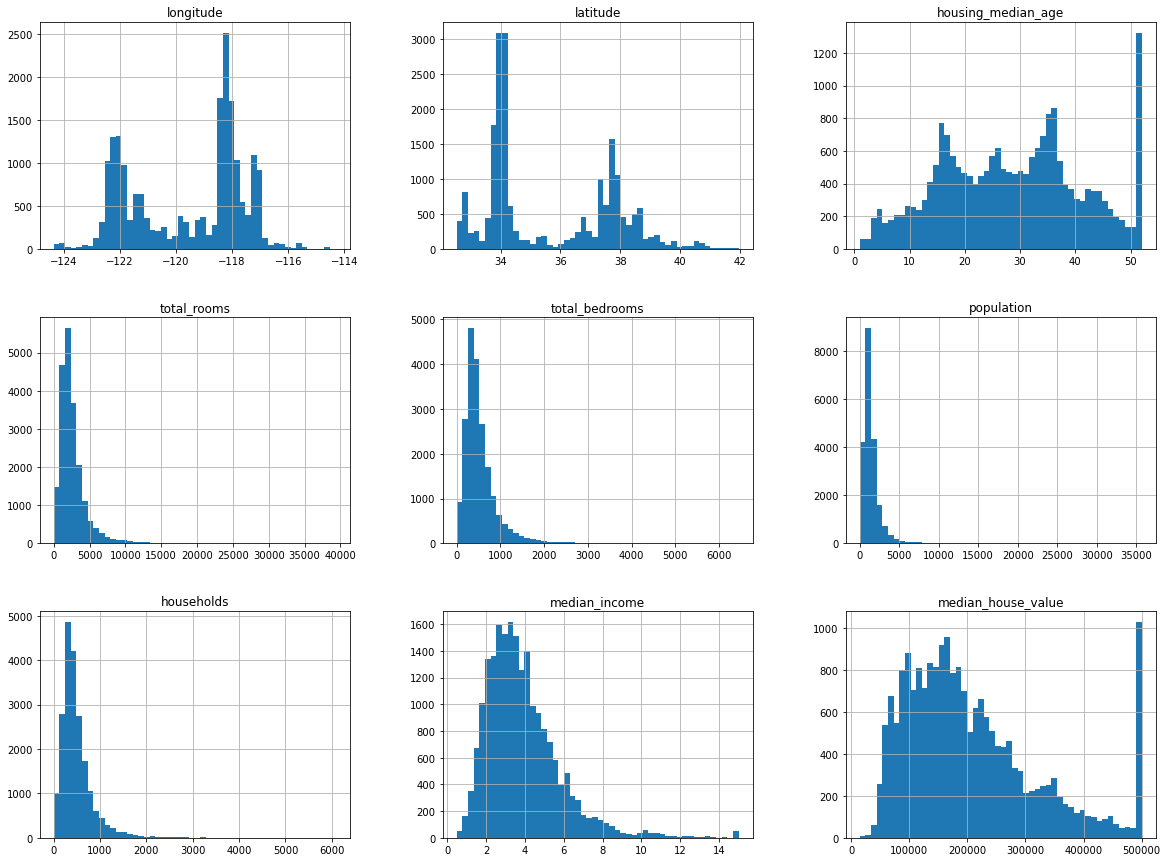

In [10]:
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

`%matplotlib inline` tells jupyter notebook to setup matplot such that it jupyter uses its own backend to draw the plot

# Splitting the dataset into training and test

In [11]:
from sklearn.model_selection import train_test_split
train_datasaet, test_dataset = train_test_split(housing_data, test_size=0.2, random_state=42)

# Splitting the median attribute in categories

In [12]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                   bins=[0, 1.5, 3., 4.5, 6., np.inf],
                                   labels=[1,2,3,4,5])

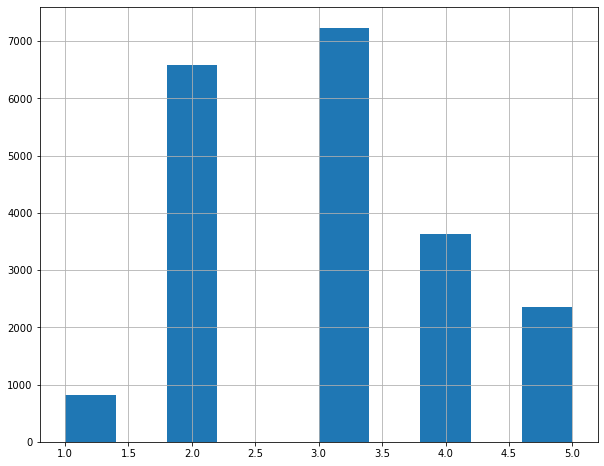

In [13]:
housing_data.income_cat.hist(figsize=(10, 8))
plt.show()

**Now you are ready to do Stratified Sampling based on INcome category**

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [28]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploring the data

In [17]:
housing_data = strat_train_set.copy()

## Visualizing geographical data

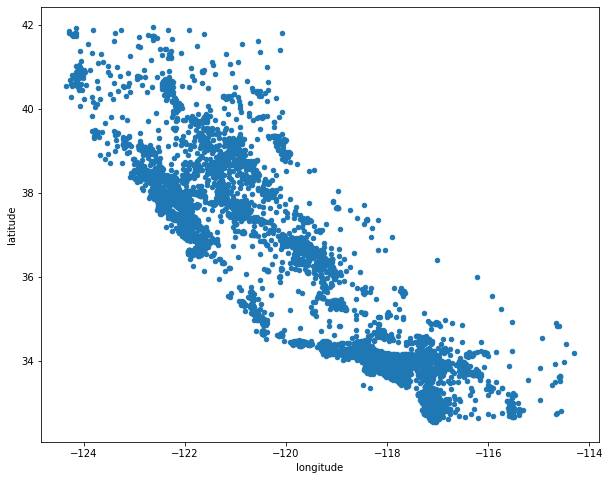

In [18]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,8))
plt.show()

**There is no clear way to see the high density areas. Its better to use alpha**


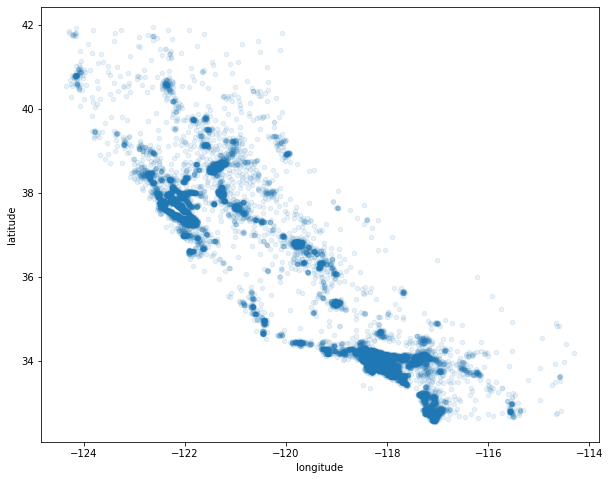

In [19]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,8))
plt.show()

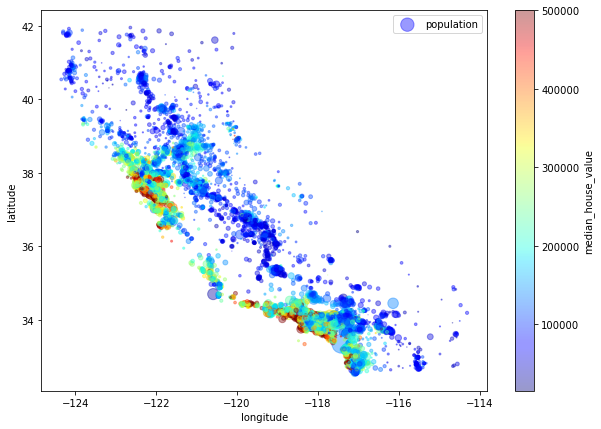

In [20]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing_data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

## Looking for Correlations

In [21]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- The correlation coefficient ranges from -1 to 1. If it is close to 1, it means that there is strong positive correlation `median_income` and `median_house_value`
- If value is close to -1 then there is negative correlation `latitude` and `median_house_value`
- If value is close to 0 then there is no linear correlation

# Experimenting with Attribute Combinations

In [23]:
housing_data["rooms_per_household"] = housing_data["total_rooms"] / housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data.total_bedrooms / housing_data.total_rooms
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]

In [24]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare the data for machine learning algorithms

In [25]:
housing_data = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning
- Get rid of the corresponding districts `dropna`
- Get rid of the whole attribute `drop`
- Set the values to some value(zero, mean, median etc) `fillna`

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [27]:
# since this can only be applied on numerical data
housing_num = housing_data.drop("ocean_proximity", axis=1)

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The above code just computed the median of each attribute and stored it in statistics_

In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
X = imputer.transform(housing_num)

- if you want to put it back in a dataframe then you can do it by the below code

In [32]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Text and Categorical Attributes

In [33]:
housing_cat = housing_data[["ocean_proximity"]]

In [34]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [36]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [37]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [40]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [41]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [43]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.values)

## Transformation Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attributes = ["ocean_proximity"]

In [47]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [48]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attributes)
])
housing_prepared = full_pipeline.fit_transform(housing_data)

# Select and Train the model

## Training and evaluating on the training set

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [50]:
some_data = housing_data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 86208. 304704. 153536. 185728. 244416.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

### Applying decision tree regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation using Cross Validation
- Instead of splitting the data into train and validation set we can use Kfold

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [56]:
display_scores(tree_rmse_scores)

Scores:  [71986.9279509  70083.29273443 69752.93147929 71673.92317148
 71231.73596705 75773.54433849 71408.18205989 74459.85570581
 67953.79547253 69824.25696944]
Mean:  71414.84458493236
Standard Deviation:  2184.9976186954295


In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean:  69116.4347200802
Standard Deviation:  2880.6588594759014


## Applying Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [51959.30137638 48795.28653239 46777.46119621 51783.73006827
 47691.03547018 51792.81652792 52624.00496132 50019.83974904
 48888.09126111 53757.42194179]
Mean:  50408.89890846112
Standard Deviation:  2190.2175050725623


## Saving the model

In [79]:
# from sklearn.externals import joblib
# joblib.dump(forest_reg, "my_model.pkl")
# # load
# my_model = joblib.load("my_model.pkl")

# Fine Tune your model

## Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        "n_estimators":[3, 10, 30],
        "max_features": [2, 4, 6, 8]
    },
    {
        "bootstrap":[False],
        "n_estimators":[3, 10],
        "max_features": [2, 3, 4]
    }
]
forest_reg = RandomForestRegressor()

In [60]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [61]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

### Evaluation Scores

In [64]:
cvres = grid_search.cv_results_

In [65]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63191.52814194139 {'max_features': 2, 'n_estimators': 3}
55748.71918004838 {'max_features': 2, 'n_estimators': 10}
52454.64494398058 {'max_features': 2, 'n_estimators': 30}
61052.3285135048 {'max_features': 4, 'n_estimators': 3}
52881.21379759758 {'max_features': 4, 'n_estimators': 10}
50344.77852949772 {'max_features': 4, 'n_estimators': 30}
59550.01402456821 {'max_features': 6, 'n_estimators': 3}
52324.19397663625 {'max_features': 6, 'n_estimators': 10}
49997.04985777444 {'max_features': 6, 'n_estimators': 30}
58524.00866364256 {'max_features': 8, 'n_estimators': 3}
52281.154295419736 {'max_features': 8, 'n_estimators': 10}
49918.54776220288 {'max_features': 8, 'n_estimators': 30}
61897.710960601165 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53775.060952791886 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59920.15878460322 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52502.234211757706 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [66]:
forest_reg = RandomForestRegressor(max_features=8, n_estimators=30)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(max_features=8, n_estimators=30)

In [67]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [51771.69754813 48858.72913095 46346.89589389 50773.81050505
 46881.85127986 49369.75008197 51609.99233577 48511.0854703
 47220.23440277 53585.26582339]
Mean:  49492.9312472103
Standard Deviation:  2265.4891856682757


# Evaluate your system on the test set

In [68]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [69]:
final_rmse

47984.66996071316